In [49]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [50]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************
    n, _ = np.shape(tx)
    w = np.matmul(np.linalg.inv(np.matmul((tx.T), tx)), tx.T).dot(y)
    error = np.sum(np.square(y - tx.dot(w))) / (2*n)
    return error, w

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [51]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    print('shape of y is: ', np.shape(y))
    print('shape of tx is:', np.shape(tx))
    loss_mse, w_opt = least_squares(y, tx)
    print(loss_mse, w_opt)
    from gradient_descent import gradient_descent
    max_iter = 1000
    w_init = np.asarray([70, 20])
    gamma = 0.01
    loss_gd, w_gd = gradient_descent(y, tx, w_init, max_iter, gamma)
    

Test it here

In [52]:
test_your_least_squares()

shape of y is:  (10000,)
shape of tx is: (10000, 2)
15.3858878688294 [73.293922   13.47971243]
Gradient Descent(0/999): loss=42.06792391202398, w0=70.03293922002105, w1=19.934797124349892
Gradient Descent(1/999): loss=41.53695139476443, w0=70.06554904784188, w1=19.870246277456282
Gradient Descent(2/999): loss=41.016545230598325, w0=70.09783277738451, w1=19.80634093903161
Gradient Descent(3/999): loss=40.50649514909915, w0=70.12979366963172, w1=19.743074653991183
Gradient Descent(4/999): loss=40.006595064221756, w0=70.16143495295645, w1=19.680441031801163
Gradient Descent(5/999): loss=39.516642991033464, w0=70.19275982344794, w1=19.61843374583304
Gradient Descent(6/999): loss=39.036440964101594, w0=70.22377144523452, w1=19.557046532724602
Gradient Descent(7/999): loss=38.56579495750568, w0=70.25447295080322, w1=19.496273191747246
Gradient Descent(8/999): loss=38.10451480644103, w0=70.28486744131624, w1=19.436107584179663
Gradient Descent(9/999): loss=37.65241413038255, w0=70.31495798692

## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [53]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [54]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************
    n = np.shape(x)
    res = np.zeros((n, degree+1))
    for i in range(n):
        for j in range(d+1):
            res[i][j] = np.power(x[i], j)
    return res

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [55]:
from costs import calculate_mse
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
#         raise NotImplementedError
        poly_x = build_poly(x, degree)
#         print(np.shape(poly_x))
        weights = np.matmul(np.linalg.inv(np.matmul((poly_x.T), poly_x)), poly_x.T).dot(y)
        l_mse = calculate_mse(y - poly_x.dot(weights))
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        # ***************************************************
#         raise NotImplementedError
        
        rmse = np.sqrt(2 * l_mse)
        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

50
Processing 1th experiment, degree=1, rmse=0.47187607963421874
64
50
Processing 2th experiment, degree=3, rmse=0.258582776677375
64
50
Processing 3th experiment, degree=7, rmse=0.24965870360907608
64
50
Processing 4th experiment, degree=12, rmse=0.298581354680811
64


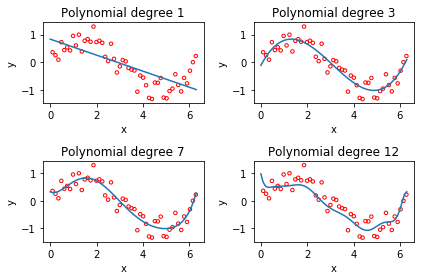

In [56]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [92]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
#     print(np.shape(x))
    n = np.shape(x)[0]
    random_list = np.random.permutation(list(range(n)))
    random_list = random_list[:int(n*ratio)]
    training_x = []
    testing_x = []
    training_y = []
    testing_y = []
    for i in range(n):
        if i in random_list:
            training_x.append(x[i])
            training_y.append(y[i])
        else:
            testing_x.append(x[i])
            testing_y.append(y[i])
    training_x = np.asarray(training_x)
    training_y = np.asarray(training_y)
    testing_x = np.asarray(testing_x)
    testing_y = np.asarray(testing_y)
    return training_x, training_y, testing_x, testing_y
#     raise NotImplementedError

Then, test your `split_data` function below.

In [93]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""

    training_x, training_y, testing_x, testing_y = split_data(x, y, ratio)

    training_x_poly = build_poly(training_x, degree)
    testing_x_poly = build_poly(testing_x, degree)

    weights_tr = np.matmul(np.linalg.inv(np.matmul((training_x_poly.T), training_x_poly)), training_x_poly.T).dot(training_y)
    
    rmse_tr = np.sqrt(2*calculate_mse(training_y - training_x_poly.dot(weights_tr)))
    rmse_te = np.sqrt(2*calculate_mse(testing_y - testing_x_poly.dot(weights_tr)))
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [94]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

45
5
proportion=0.9, degree=1, Training RMSE=0.455, Testing RMSE=0.621
45
5
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.214
45
5
proportion=0.9, degree=7, Training RMSE=0.257, Testing RMSE=0.189
45
5
proportion=0.9, degree=12, Training RMSE=1.721, Testing RMSE=1.542
25
25
proportion=0.5, degree=1, Training RMSE=0.400, Testing RMSE=0.553
25
25
proportion=0.5, degree=3, Training RMSE=0.237, Testing RMSE=0.306
25
25
proportion=0.5, degree=7, Training RMSE=0.218, Testing RMSE=0.336
25
25
proportion=0.5, degree=12, Training RMSE=1.012, Testing RMSE=1.166
5
45
proportion=0.1, degree=1, Training RMSE=0.453, Testing RMSE=0.748
5
45
proportion=0.1, degree=3, Training RMSE=0.111, Testing RMSE=0.674
5
45
proportion=0.1, degree=7, Training RMSE=0.785, Testing RMSE=2.455
5
45
proportion=0.1, degree=12, Training RMSE=3.043, Testing RMSE=324.211


# 3 Ridge Regression
Please fill in the function below.

In [95]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    return np.linalg.inv(tx.T.dot(tx) + (2*tx.shape[0])*lambda_*np.identity(tx.shape[1])).dot(tx.T).dot(y)

In [96]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    training_x, training_y, testing_x, testing_y = split_data(x, y, ratio)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    training_x_poly = build_poly(training_x, degree)
    testing_x_poly = build_poly(testing_x, degree)

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        w_train = ridge_regression(training_y, training_x_poly, lambda_)
#         print(w_train)
        e_train = training_y - training_x_poly.dot(w_train)
        e_test = testing_y - testing_x_poly.dot(w_train)
        rmse_tr.append(np.sqrt(2 * calculate_mse(e_train)))
        rmse_te.append(np.sqrt(2 * calculate_mse(e_test)))
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)


25
25
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.220, Testing RMSE=0.319
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.222, Testing RMSE=0.319
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.225, Testing RMSE=0.322
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.226, Testing RMSE=0.325
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.327
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.228, Testing RMSE=0.329
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.228, Testing RMSE=0.329
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.229, Testing RMSE=0.327
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.229, Testing RMSE=0.319
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.232, Testing RMSE=0.302
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.239, Testing RMSE=0.279
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.259, Testing RMSE=0.266
proportion=0.5, degree=7, lambda=0

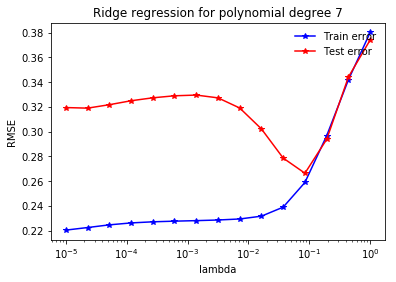

In [97]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)